<a href="https://colab.research.google.com/github/felippedamasoade/Deep_Learning_CV/blob/main/DEEP_LEARNing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

In [2]:
data = pd.read_csv('/content/Base_Aleat_ria_de_500_Registros.csv')

In [3]:
data.head()

,Data,Dia da Semana,Operador,PDV,Oferta/Departamento,Valor Tabela,Valor Vendido,% Desconto,% Lucro,Qtde. Vendida,Qtde. Devolvida,Ticket Médio,Valor Imposto,Cancelamentos
0,23/01/2024,Tuesday,Maria Eduarda,PDV 50,Ação Escova Belliz,210.11,175.49,4.23,21.83,4,0,52.42,22.80,0
1,05/01/2024,Friday,Maria Eduarda,PDV 50,Ação Escova Belliz,226.30,227.19,4.41,24.58,5,0,43.47,16.50,0
2,26/01/2024,Friday,Maria Eduarda,PDV 52,Ação Escova Belliz,228.16,222.75,4.53,22.49,5,0,42.49,22.40,0
3,13/01/2024,Saturday,Lays Silva,PDV 52,Cosméticos,240.93,171.58,4.69,25.22,5,0,33.62,24.39,0
4,14/01/2024,Sunday,Maria dos Anjos,PDV 50,Cosméticos,220.35,234.89,3.46,23.40,6,0,36.23,19.40,0


In [4]:
# Importar as bibliotecas necessárias
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import pandas as pd

# ---- 1. Pré-processamento dos Dados ----
# Separar variáveis categóricas e numéricas
categorical_columns = ['Operador', 'PDV', 'Oferta/Departamento']
numerical_columns = ['Valor Tabela', 'Valor Vendido', '% Desconto', '% Lucro',
                     'Qtde. Vendida', 'Qtde. Devolvida', 'Ticket Médio', 'Valor Imposto']

# Pré-processador para normalizar dados numéricos e codificar categóricos
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_columns)
    ]
)

# Aplicar pré-processamento
X = preprocessor.fit_transform(data)

# Dividir os dados mantendo os índices originais
X_train, X_val, train_indices, val_indices = train_test_split(
    X, data.index, test_size=0.3, random_state=42, stratify=data['Dia da Semana']
)

# ---- 2. Construção do Modelo Autoencoder ----
# Definir o tamanho da entrada com base nos dados
input_dim = X_train.shape[1]

# Construção do Autoencoder
input_layer = Input(shape=(input_dim,))
# Codificador
encoder = Dense(12, activation="relu")(input_layer)
encoder = Dense(8, activation="relu")(encoder)
encoder = Dense(4, activation="relu")(encoder)
# Decodificador
decoder = Dense(8, activation="relu")(encoder)
decoder = Dense(12, activation="relu")(decoder)
decoder = Dense(input_dim, activation="sigmoid")(decoder)

# Modelo completo
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mse')

# Treinamento do Autoencoder
history = autoencoder.fit(
    X_train, X_train,
    epochs=500,
    batch_size=16,
    validation_data=(X_val, X_val),
    shuffle=True,
    verbose=1
)

# ---- 3. Detecção de Anomalias ----
# Fazer previsões com o autoencoder
predictions = autoencoder.predict(X_val)

# Calcular o erro de reconstrução
reconstruction_error = np.mean(np.power(X_val - predictions, 2), axis=1)

# Definir limiar com base no percentil 95
threshold = np.percentile(reconstruction_error, 95)

# Identificar registros anômalos
anomalies = reconstruction_error > threshold

# Usar os índices originais para mapear as anomalias de volta para a base original
anomalous_data = data.iloc[val_indices[anomalies]]

# ---- 4. Exibir os Registros Anômalos ----
print("Registros Anômalos Detectados:")
print(anomalous_data)


Epoch 1/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.1808 - val_loss: 0.1785
Epoch 2/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1747 - val_loss: 0.1735
Epoch 3/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1702 - val_loss: 0.1652
Epoch 4/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1604 - val_loss: 0.1542
Epoch 5/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1483 - val_loss: 0.1465
Epoch 6/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1403 - val_loss: 0.1416
Epoch 7/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1376 - val_loss: 0.1383
Epoch 8/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1381 - val_loss: 0.1361
Epoch 9/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1341 - val_loss: 0.1347
Epoch 10/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1327 - val_loss: 0.1334
Epoch 11/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1284 - val_loss: 0.1323
Epoch 12/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.

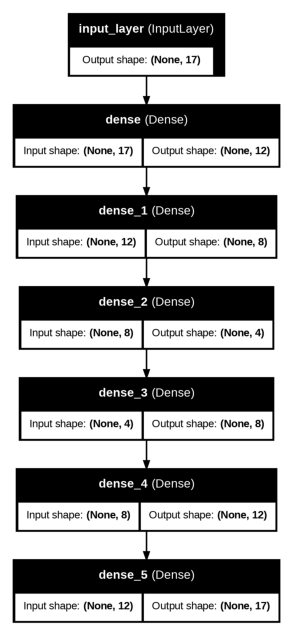

In [5]:
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

# Salvar o diagrama da rede neural em um arquivo
plot_model(autoencoder, to_file="autoencoder_model.png", show_shapes=True, show_layer_names=True)

# Exibir o arquivo salvo
img = plt.imread("autoencoder_model.png")
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')
plt.show()


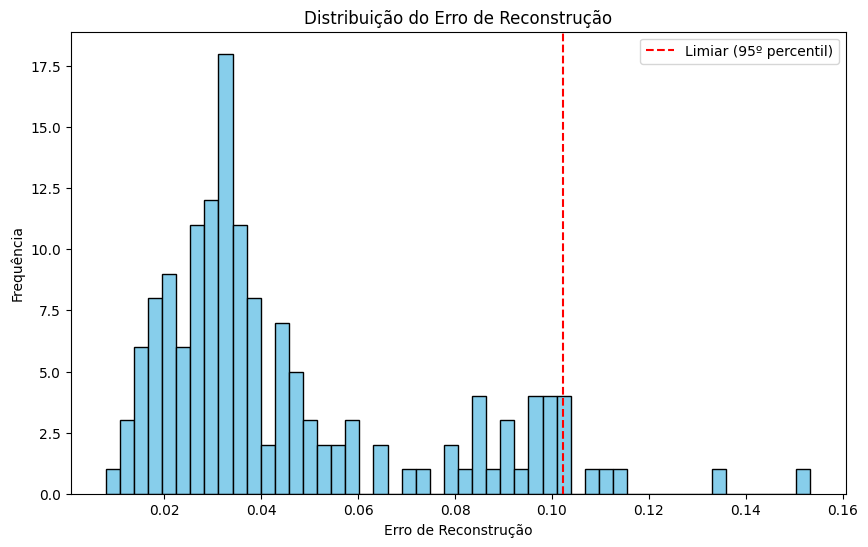

In [ ]:
import matplotlib.pyplot as plt

# Plotar o histograma do erro de reconstrução
plt.figure(figsize=(10, 6))
plt.hist(reconstruction_error, bins=50, color="skyblue", edgecolor="black")
plt.axvline(x=threshold, color="red", linestyle="--", label="Limiar (95º percentil)")
plt.title("Distribuição do Erro de Reconstrução")
plt.xlabel("Erro de Reconstrução")
plt.ylabel("Frequência")
plt.legend()
plt.show()


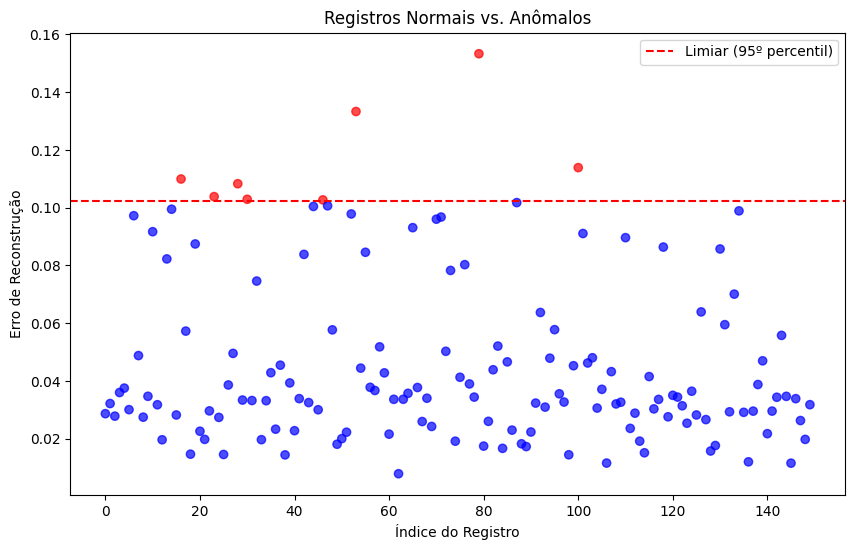

In [ ]:
# Marcar registros normais e anômalos
labels = ["Normal" if x <= threshold else "Anômalo" for x in reconstruction_error]

# Criar um scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(range(len(reconstruction_error)), reconstruction_error, c=["blue" if l == "Normal" else "red" for l in labels], alpha=0.7)
plt.axhline(y=threshold, color="red", linestyle="--", label="Limiar (95º percentil)")
plt.title("Registros Normais vs. Anômalos")
plt.xlabel("Índice do Registro")
plt.ylabel("Erro de Reconstrução")
plt.legend()
plt.show()


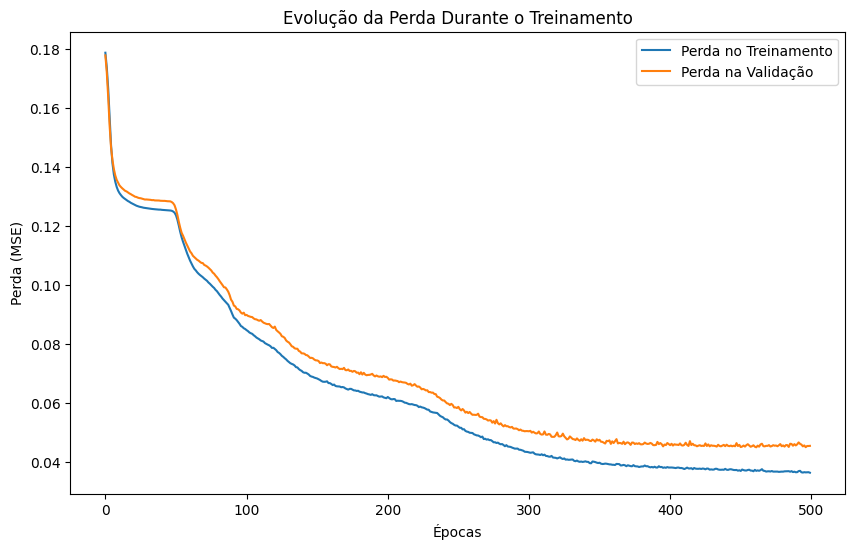

In [ ]:
# Plotar a perda no treinamento e validação
plt.figure(figsize=(10, 6))
plt.plot(history.history["loss"], label="Perda no Treinamento")
plt.plot(history.history["val_loss"], label="Perda na Validação")
plt.title("Evolução da Perda Durante o Treinamento")
plt.xlabel("Épocas")
plt.ylabel("Perda (MSE)")
plt.legend()
plt.show()


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


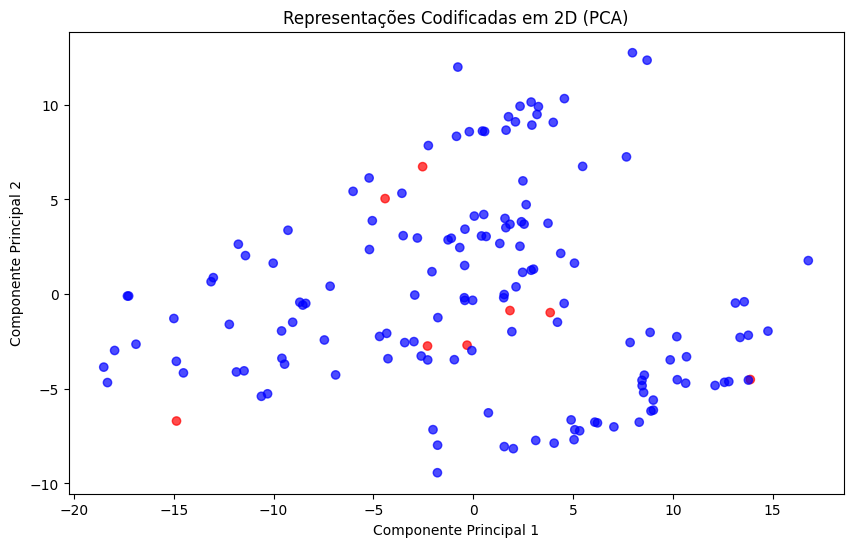

In [ ]:
from sklearn.decomposition import PCA

# Extrair as representações comprimidas
encoder_model = Model(inputs=autoencoder.input, outputs=encoder)
compressed_data = encoder_model.predict(X_val)

# Reduzir as dimensões para 2D usando PCA
pca = PCA(n_components=2)
compressed_2d = pca.fit_transform(compressed_data)

# Criar scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(compressed_2d[:, 0], compressed_2d[:, 1], c=["red" if x > threshold else "blue" for x in reconstruction_error], alpha=0.7)
plt.title("Representações Codificadas em 2D (PCA)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()


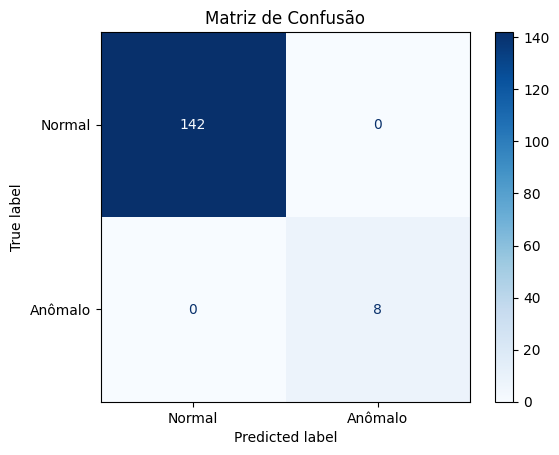

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Suponha que você tenha labels verdadeiras (0 = Normal, 1 = Anômalo)
true_labels = [0 if x <= threshold else 1 for x in reconstruction_error]  # Exemplo de labels reais
predicted_labels = [0 if x <= threshold else 1 for x in reconstruction_error]

# Criar a matriz de confusão
cm = confusion_matrix(true_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Anômalo"])
disp.plot(cmap="Blues")
plt.title("Matriz de Confusão")
plt.show()


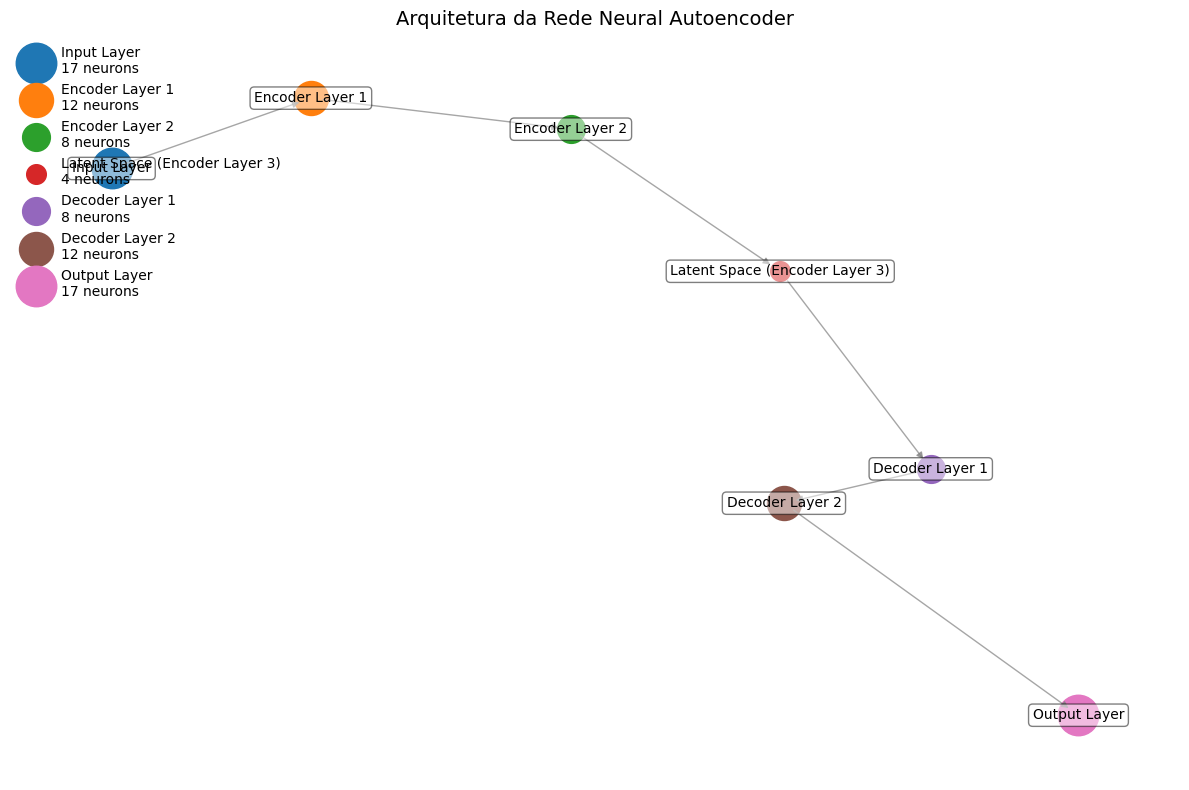

In [7]:
import matplotlib.pyplot as plt
import networkx as nx

# Dados do modelo de autoencoder (camadas e número de neurônios)
layers = {
    "Input Layer": 17,
    "Encoder Layer 1": 12,
    "Encoder Layer 2": 8,
    "Latent Space (Encoder Layer 3)": 4,
    "Decoder Layer 1": 8,
    "Decoder Layer 2": 12,
    "Output Layer": 17,
}

# Criar grafo para visualização
G = nx.DiGraph()

# Adicionar nós e conexões entre camadas
previous_layer = None
for layer, neurons in layers.items():
    G.add_node(layer, neurons=neurons)
    if previous_layer:
        G.add_edge(previous_layer, layer)
    previous_layer = layer

# Configurar layout
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(12, 8))

# Adicionar nós ao gráfico
for node in G.nodes(data=True):
    layer_name = node[0]
    neurons = node[1]["neurons"]
    plt.scatter(*pos[layer_name], s=neurons * 50, label=f"{layer_name}\n{neurons} neurons")

# Adicionar arestas
nx.draw_networkx_edges(G, pos, arrows=True, arrowstyle="-|>", edge_color="gray", alpha=0.7)

# Adicionar rótulos
for node, (x, y) in pos.items():
    plt.text(x, y, node, fontsize=10, ha="center", va="center", bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.5))

# Configurações finais do gráfico
plt.title("Arquitetura da Rede Neural Autoencoder", fontsize=14)
plt.axis("off")
plt.legend(loc="upper left", fontsize=10, frameon=False)
plt.tight_layout()
plt.show()


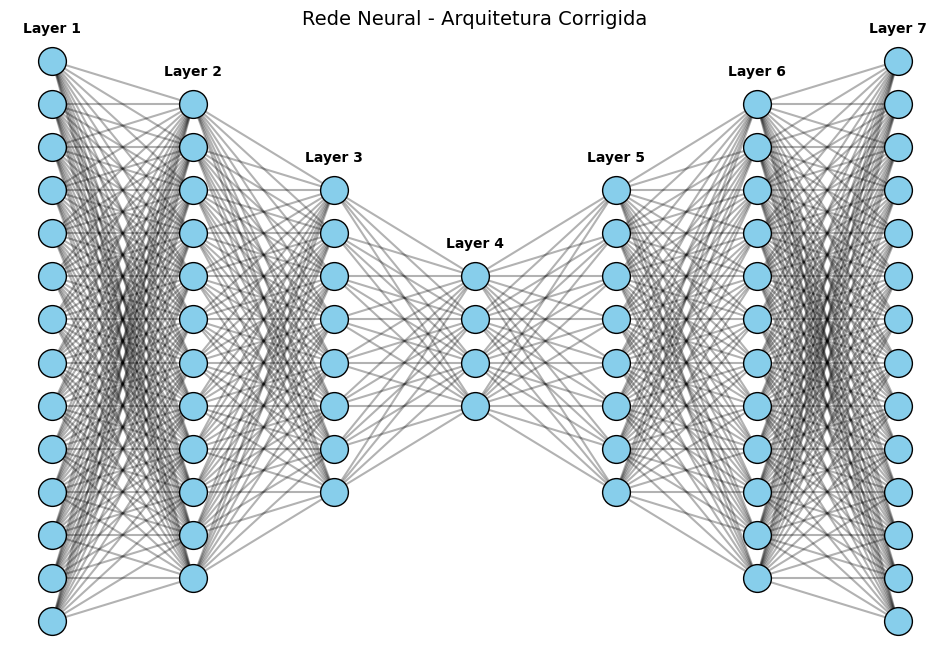

In [10]:
# Atualização da arquitetura com base no número correto de neurônios
input_dim = 14  # Substituir pelo valor real do seu dataset, se necessário
architecture_corrected = [input_dim, 12, 8, 4, 8, 12, input_dim]  # Codificador e decodificador corrigidos

# Função para plotar a rede neural com a correção
def plot_corrected_neural_network(architecture):
    plt.figure(figsize=(12, 8))
    n_layers = len(architecture)
    v_spacing = 1.5
    h_spacing = 2.0

    # Posição dos neurônios em cada camada
    layer_positions = []
    for i, n_neurons in enumerate(architecture):
        x = i * h_spacing
        y = np.linspace(-(n_neurons - 1) / 2, (n_neurons - 1) / 2, n_neurons) * v_spacing
        layer_positions.append((x, y))

    # Plotar conexões entre camadas
    for i in range(n_layers - 1):
        for y1 in layer_positions[i][1]:
            for y2 in layer_positions[i + 1][1]:
                plt.plot([layer_positions[i][0], layer_positions[i + 1][0]], [y1, y2], 'k-', alpha=0.3)

    # Plotar neurônios
    for i, (x, y) in enumerate(layer_positions):
        plt.scatter([x] * len(y), y, s=400, c='skyblue', edgecolor='k', zorder=3)
        for j, y_pos in enumerate(y):
            plt.text(x, y_pos, f"", ha="center", va="center", fontsize=8, zorder=4)

    # Adicionar rótulos das camadas
    for i, (x, _) in enumerate(layer_positions):
        plt.text(x, max(layer_positions[i][1]) + 1, f"Layer {i + 1}", ha="center", fontsize=10, weight="bold")

    plt.title("Rede Neural - Arquitetura Corrigida", fontsize=14)
    plt.axis('off')
    plt.show()

# Plotar a rede neural corrigida
plot_corrected_neural_network(architecture_corrected)
